In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the data

In [3]:
fb_data = pd.read_csv('pseudo_facebook.csv')
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### Check the data columns

In [4]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

Check if there are any null values

In [5]:
fb_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

The 'gender' and 'tenure' columns both have null values. Before we can take appropriate action on the missing statistics, we must first establish whether those values are significant and will have an influence on the analysis. We exclude these values since they cannot be ballparked here and because they represent 175 values out of total 98000.

In [6]:
fb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,99003.0,1.597045e+06,344059.177464,1000008.0,1298805.5,1596148.0,1895744.0,2193542.0
age,99003.0,3.728022e+01,22.589748,13.0,20.0,28.0,50.0,113.0
dob_day,99003.0,1.453041e+01,9.015606,1.0,7.0,14.0,22.0,31.0
dob_year,99003.0,1.975720e+03,22.589748,1900.0,1963.0,1985.0,1993.0,2000.0
dob_month,99003.0,6.283365e+00,3.529672,1.0,3.0,6.0,9.0,12.0
tenure,99001.0,5.378874e+02,457.649874,0.0,226.0,412.0,675.0,3139.0
friend_count,99003.0,1.963508e+02,387.304229,0.0,31.0,82.0,206.0,4923.0
friendships_initiated,99003.0,1.074525e+02,188.786951,0.0,17.0,46.0,117.0,4144.0
likes,99003.0,1.560788e+02,572.280681,0.0,1.0,11.0,81.0,25111.0
likes_received,99003.0,1.426894e+02,1387.919613,0.0,1.0,8.0,59.0,261197.0


In [7]:
fb_data.dropna(inplace=True)

In [8]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   dob_day                98826 non-null  int64  
 3   dob_year               98826 non-null  int64  
 4   dob_month              98826 non-null  int64  
 5   gender                 98826 non-null  object 
 6   tenure                 98826 non-null  float64
 7   friend_count           98826 non-null  int64  
 8   friendships_initiated  98826 non-null  int64  
 9   likes                  98826 non-null  int64  
 10  likes_received         98826 non-null  int64  
 11  mobile_likes           98826 non-null  int64  
 12  mobile_likes_received  98826 non-null  int64  
 13  www_likes              98826 non-null  int64  
 14  www_likes_received     98826 non-null  int64  
dtypes:

### Month number to Month name



In [9]:

import calendar

fb_data['dob_month'] = fb_data['dob_month'].apply(lambda x:calendar.month_name[x])
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,November,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,November,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,November,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,December,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,December,male,82.0,0,0,0,0,0,0,0,0


# Change data type of tenure

Tenure in years is in float data type from 'float' to 'integer'

In [143]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 98826 non-null  int64   
 1   age                    98826 non-null  int64   
 2   dob_day                98826 non-null  int64   
 3   dob_year               98826 non-null  int64   
 4   dob_month              98826 non-null  object  
 5   gender                 98826 non-null  object  
 6   tenure                 98826 non-null  int64   
 7   friend_count           98826 non-null  int64   
 8   friendships_initiated  98826 non-null  int64   
 9   likes                  98826 non-null  int64   
 10  likes_received         98826 non-null  int64   
 11  mobile_likes           98826 non-null  int64   
 12  mobile_likes_received  98826 non-null  int64   
 13  www_likes              98826 non-null  int64   
 14  www_likes_received     98826 non-null 

In [144]:
fb_data['tenure'] = fb_data['tenure'].astype('int64')


In [12]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 98826 non-null  int64 
 1   age                    98826 non-null  int64 
 2   dob_day                98826 non-null  int64 
 3   dob_year               98826 non-null  int64 
 4   dob_month              98826 non-null  object
 5   gender                 98826 non-null  object
 6   tenure                 98826 non-null  int64 
 7   friend_count           98826 non-null  int64 
 8   friendships_initiated  98826 non-null  int64 
 9   likes                  98826 non-null  int64 
 10  likes_received         98826 non-null  int64 
 11  mobile_likes           98826 non-null  int64 
 12  mobile_likes_received  98826 non-null  int64 
 13  www_likes              98826 non-null  int64 
 14  www_likes_received     98826 non-null  int64 
dtypes: int64(13), objec

Now that all of the data types are correct, we can go on to the next stage. The column 'Age' can be divided into 'Age groups' of ten.

In [13]:
age_grp_label = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data['age_groups'] = pd.cut(fb_data['age'], bins = np.arange(10, 121, 10), labels = age_grp_label, right=True)
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_groups
0,2094382,14,19,1999,November,male,266,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,November,female,6,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,November,male,13,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,December,female,93,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,December,male,82,0,0,0,0,0,0,0,0,10-20


## Exploratory data analysis

### Age and Gender distribution

In [14]:
count = fb_data['age_groups'].value_counts()
print(count)

21-30      28634
10-20      24747
31-40      12487
51-60       9288
41-50       8962
61-70       6830
101-110     3409
71-80       2234
91-100      1201
81-90        803
111-120      231
Name: age_groups, dtype: int64


In [15]:
df = fb_data.groupby('age_groups').agg(agegroup = ('age_groups', 'count'))

print(df)

            agegroup
age_groups          
10-20          24747
21-30          28634
31-40          12487
41-50           8962
51-60           9288
61-70           6830
71-80           2234
81-90            803
91-100          1201
101-110         3409
111-120          231


Some algorithms are incapable of dealing with categorical variables. In this scenario, we must transform them into a column of indicator/dummy labels.

In [16]:
fb1 = pd.get_dummies(fb_data,columns=['gender'])
fb1.head()


,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_groups,gender_female,gender_male
0,2094382,14,19,1999,November,266,0,0,0,0,0,0,0,0,10-20,0,1
1,1192601,14,2,1999,November,6,0,0,0,0,0,0,0,0,10-20,1,0
2,2083884,14,16,1999,November,13,0,0,0,0,0,0,0,0,10-20,0,1
3,1203168,14,25,1999,December,93,0,0,0,0,0,0,0,0,10-20,1,0
4,1733186,14,4,1999,December,82,0,0,0,0,0,0,0,0,10-20,0,1


We utilise the groupby clause and build a new data frame 'dfn' with columns age groups, male counts, and female counts to determine the total number of males and females across each age group.

In [17]:
dfn = fb1.groupby('age_groups').agg(male = ('gender_male', 'sum'), female = ('gender_female', 'sum'))
df_gchart = dfn.reset_index()
df_gchart.head()

,age_groups,male,female
0,10-20,15044.0,9703.0
1,21-30,18828.0,9806.0
2,31-40,7799.0,4688.0
3,41-50,5031.0,3931.0
4,51-60,4367.0,4921.0


In this case, I've used a "Population pyramid" as a visual depiction of the distribution of males and females among age groups. In both male and female situations, the majority of users are between the ages of 21 and 30, with a large contribution from females between the ages of 10 and 20.

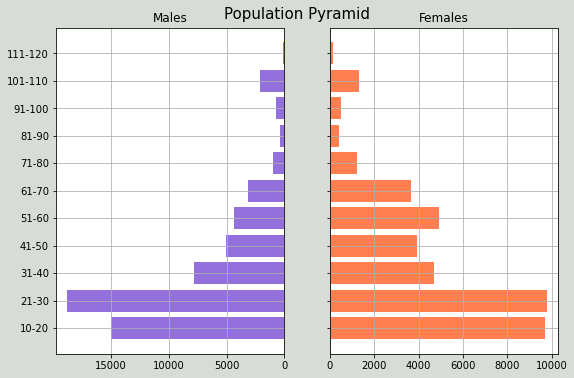

In [18]:
y = range(0, len(df_gchart))
x_male = df_gchart['male']
x_female = df_gchart['female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='mediumpurple')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='coral')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_gchart['age_groups'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

To assist me understand the counts by age, I utilised a countplot. We can see that age 18 is at the top of the list, followed by age value 23. Surprisingly, some surges occur near age values greater than 100. Which might indicate a data inaccuracy. If we are developing a model, we must investigate them further and consider them outliers. 

<AxesSubplot:xlabel='age', ylabel='count'>

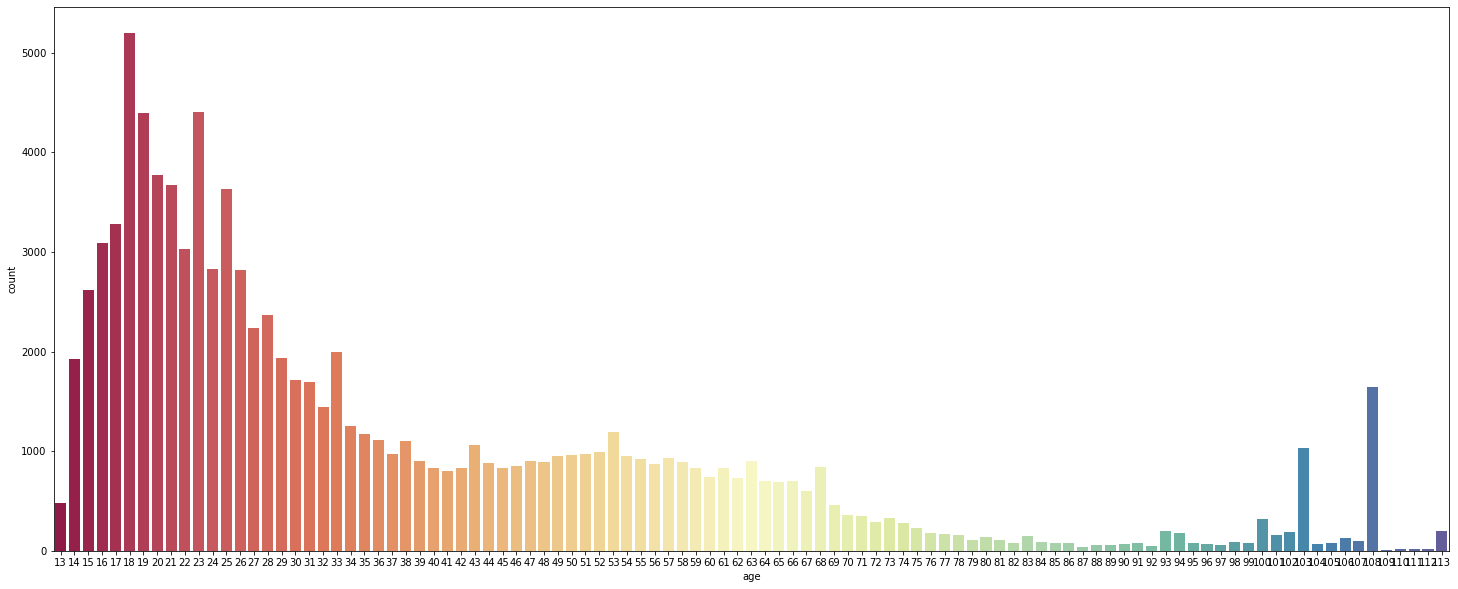

In [19]:
plt.figure(figsize=(25,10))

sns.countplot(x='age', data=fb1, palette= 'Spectral' )


# Tenure analysis

We must convert the tenure value to years for tenure analysis by dividing it by 365 and rounding up to two decimal places.

In [20]:
fb_data['tenure_in_years'] = np.round(fb_data['tenure']/365, decimals=2)
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_groups,tenure_in_years
0,2094382,14,19,1999,November,male,266,0,0,0,0,0,0,0,0,10-20,0.73
1,1192601,14,2,1999,November,female,6,0,0,0,0,0,0,0,0,10-20,0.02
2,2083884,14,16,1999,November,male,13,0,0,0,0,0,0,0,0,10-20,0.04
3,1203168,14,25,1999,December,female,93,0,0,0,0,0,0,0,0,10-20,0.25
4,1733186,14,4,1999,December,male,82,0,0,0,0,0,0,0,0,10-20,0.22


In [21]:
fb_data['tenure_in_years'].describe()


count    98826.000000
mean         1.467537
std          1.244565
min          0.000000
25%          0.620000
50%          1.130000
75%          1.840000
max          8.600000
Name: tenure_in_years, dtype: float64

I then used histplot to examine the distribution of tenure in years. As a result of this, we may deduce that there are a substantial number of individuals, primarily between the ages of 0 and 2 years.

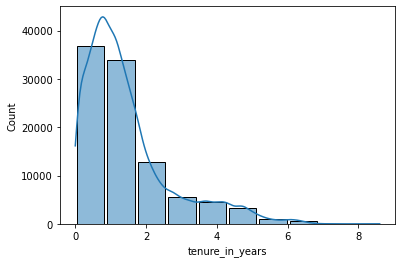

In [22]:
sns.histplot(data=fb_data, x="tenure_in_years", bins=10, shrink=0.9, kde=True)
plt.show()

## Age group vs likes received

Next, I examined the age groups and the likes received to see how they are connected. For comprehension, I used catplot. According to the findings, girls between the ages of 10 and 20, followed by those between the ages of 21 and 30, make the most contribution.

<Figure size 1080x720 with 0 Axes>

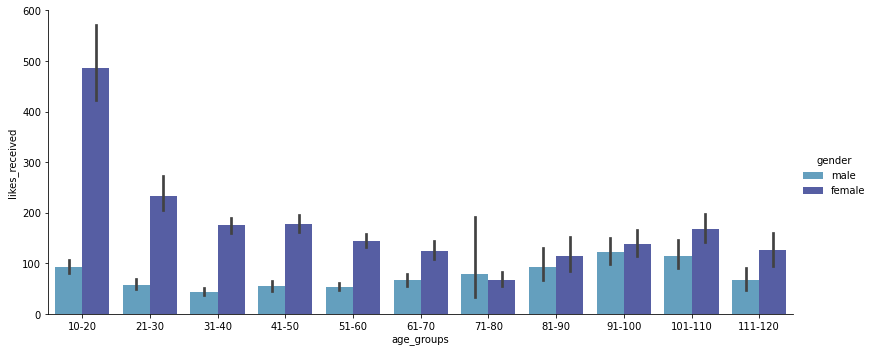

In [65]:
plt.figure(figsize=(15,10))
sns.set_palette("icefire")
sns.catplot(x="age_groups", y="likes_received", hue="gender", kind="bar", data=fb_data, height=5, aspect=18/8)


## Likes vs Friendship Initiated

I was curious to see whether there was a link between the likes given and the friendships formed. Is it true that persons who gives the most likes initiate the most friendship requests?

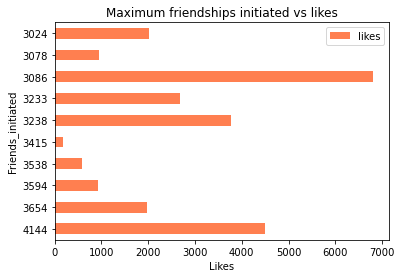

In [76]:
max_data = fb_data.sort_values(by='friendships_initiated',ascending=False)[:10]
max_data.plot.barh(x = 'friendships_initiated',y = 'likes', color = 'coral')


plt.ylabel("Friends_initiated")
plt.xlabel("Likes")
plt.title("Maximum friendships initiated vs likes")
plt.show()


Seems like there is no significant trend found between friendships initiated and likes provided. 

## Likes vs Friendship Initiated

Next, I'd like to check whether there was a correlation between the number of likes and the number of friendships. Is it true that those who have the most likes have a lot of friends?

In [149]:
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_groups,tenure_in_years,device
0,2094382,14,19,1999,November,male,266,0,0,0,0,0,0,0,0,10-20,0.73,unknown
1,1192601,14,2,1999,November,female,6,0,0,0,0,0,0,0,0,10-20,0.02,unknown
2,2083884,14,16,1999,November,male,13,0,0,0,0,0,0,0,0,10-20,0.04,unknown
3,1203168,14,25,1999,December,female,93,0,0,0,0,0,0,0,0,10-20,0.25,unknown
4,1733186,14,4,1999,December,male,82,0,0,0,0,0,0,0,0,10-20,0.22,unknown


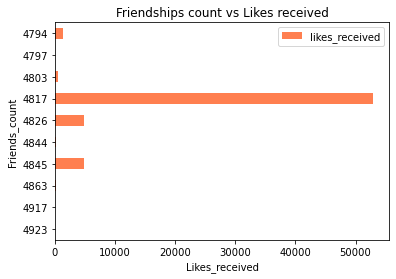

In [151]:
max_data1 = fb_data.sort_values(by='friend_count',ascending=False)[:10]
max_data1.plot.barh(x = 'friend_count',y = 'likes_received', color = 'coral')


plt.ylabel("Friends_count")
plt.xlabel("Likes_received")
plt.title("Friendships count vs Likes received")
plt.show()


There appears to be no substantial relationship between the number of friends and the number of likes received.

## Mobile Like vs WWW likes

Next I wanted to understand the distribution of mobile likes and www likes. 

<AxesSubplot:xlabel='gender', ylabel='mobile_likes_received'>

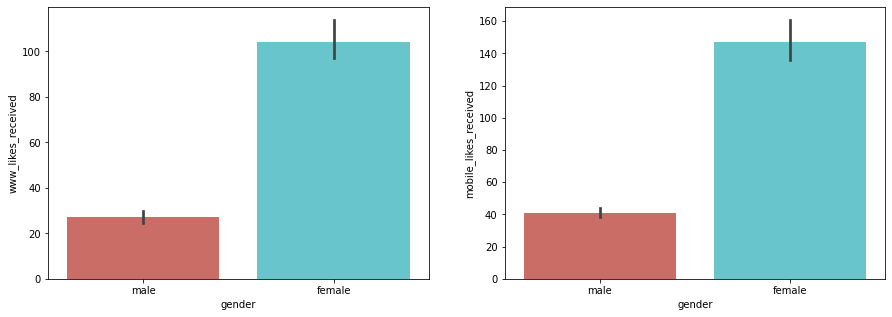

In [152]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='gender',y='www_likes_received',data=fb_data, palette='hls')
plt.subplot(1,2,2)
sns.barplot(x='gender',y='mobile_likes_received',data=fb_data, palette='hls')

The above visualization reveals female population contribute to the most of the activities over both the medium while mobile device has contributed to significantly higher likes than web devices